# TP 1 Parcimonie
## Antonin GAY - MVA 2018-19

## Illustration et validation

### 1e image : Dirac 2D

In [2]:
from TP1.func_TP1 import *
%matplotlib inline

On prend un Dirac en 2D

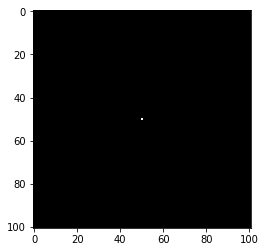

In [39]:
dirac = np.zeros((101, 101))
dirac[50, 50] = 1

plt.imshow(dirac, cmap='gray')


On calcule sa transformée en ondelettes, grâce à la fonction codée


All wavelets scale for a Kronecker


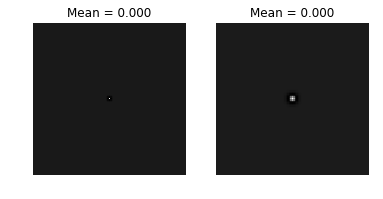

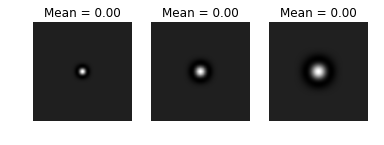

In [52]:
h1d = np.array([1 / 16, 1 / 4, 3 / 8, 1 / 4, 1 / 16])

c, w_list = wavelet_a_trous(dirac, h1d, 5)

print('\nAll wavelets scale for a Kronecker')

for i in range(2):
    # print('Mean value of W : %s' % np.mean(w_list2[i]))
    plt.subplot(1,2, i+1)
    plt.imshow(w_list[i], cmap='gray')
    plt.axis('off')
    plt.title('Mean = %.3f' % np.mean(w_list[i]))
plt.show()
    
for i in range(2,5):
    # print('Mean value of W : %s' % np.mean(w_list2[i]))
    plt.subplot(1,3, i-1)
    plt.imshow(w_list[i], cmap='gray')
    plt.axis('off')
    plt.title('Mean = %.2f' % np.mean(w_list[i]))
plt.show()


On reconstruit le Dirac avec la fonction codée

Text(0.5, 1.0, 'Dirac rebuilt')

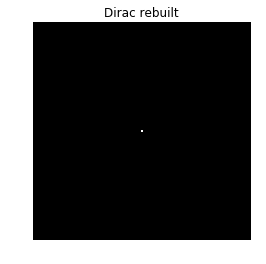

In [53]:
dirac_rebuilt = backward_wavelet(c, w_list)

plt.imshow(dirac_rebuilt, cmap='gray')
plt.axis('off')
plt.title('Dirac rebuilt')


On voit donc qu'on peut prendre une image, en obtenir sa décomposition en ondelettes, et la reconstruire à l'identique à partir de ces ondelettes.

De plus, ces ondelettes ont une valeur moyenne nulle dans le cas du Dirac.

### 2e image : NGC2997

On refait les mêmes opérations, mais sur une image astronomique


All wavelets scale from the image


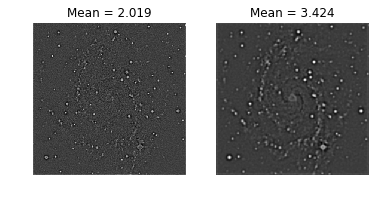

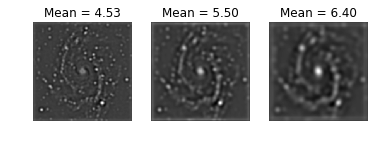

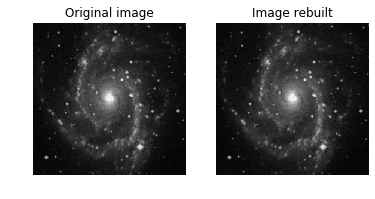

Text(0.5, 1.0, 'Différence entre la reconstruction et loriginale')

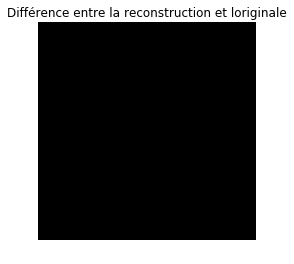

In [28]:
# On charge l'image
ngc2997_mat = loadmat('ngc2997.mat')
ngc2997 = ngc2997_mat['ngc2997']

plt.imshow(ngc2997, cmap='gray')

# Décomposition en ondelettes
c2, w_list2 = wavelet_a_trous(ngc2997, h1d, 5)

print('\nAll wavelets scale from the image')

for i in range(2):
    # print('Mean value of W : %s' % np.mean(w_list2[i]))
    plt.subplot(1,2, i+1)
    plt.imshow(w_list2[i], cmap='gray')
    plt.axis('off')
    plt.title('Mean = %.3f' % np.mean(w_list2[i]))
plt.show()

for i in range(2,5):
    # print('Mean value of W : %s' % np.mean(w_list2[i]))
    plt.subplot(1,3, i-1)
    plt.imshow(w_list2[i], cmap='gray')
    plt.axis('off')
    plt.title('Mean = %.2f' % np.mean(w_list2[i]))
plt.show()

# Reconstruction de l'image
image_rebuilt = backward_wavelet(c2, w_list2)

plt.subplot(121)
plt.imshow(ngc2997, cmap='gray')
plt.axis('off')
plt.title('Original image')
plt.subplot(122)
plt.imshow(image_rebuilt, cmap='gray')
plt.axis('off')
plt.title('Image rebuilt')
plt.show()

plt.imshow(image_rebuilt - ngc2997, cmap='gray')
plt.axis('off')
plt.title('Différence entre la reconstruction et l''originale')


On voit donc que la reconstruction est parfaite.

Néanmoins, contrairement à ce qui était attendu, les valeurs moyennes des ondelettes ne sont pas nulles...

## Coefficient normalization

On prend un bruit gaussien avec un écart type de 1, et on en calcule la décomposition en ondelette. Pour chacune des ondelette, on calcule son écart type :

Text(0.5, 1.0, 'Bruit Gaussien, std = 1.00')

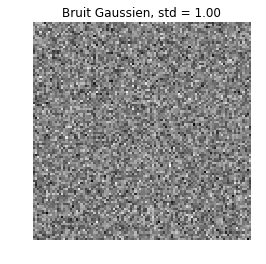

In [29]:
noise = np.random.normal(scale = 1., size=(101, 101))

plt.imshow(noise, cmap='gray')
plt.axis('off')
plt.title('Bruit Gaussien, std = %.2f' % noise.std())



All wavelets scale for a Kronecker


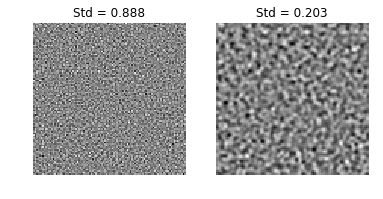

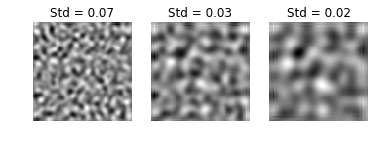

In [31]:
c3, w_list3 = wavelet_a_trous(noise, h1d, 5)

print('\nAll wavelets scale for a Kronecker')

for i in range(2):
    # print('Mean value of W : %s' % np.mean(w_list2[i]))
    plt.subplot(1,2, i+1)
    plt.imshow(w_list3[i], cmap='gray')
    plt.axis('off')
    plt.title('Std = %.3f' % np.std(w_list3[i]))
plt.show()
    
for i in range(2,5):
    # print('Mean value of W : %s' % np.mean(w_list2[i]))
    plt.subplot(1,3, i-1)
    plt.imshow(w_list3[i], cmap='gray')
    plt.axis('off')
    plt.title('Std = %.2f' % np.std(w_list3[i]))
plt.show()


On observe que l'écart type des ondelettes diminue d'étage en étage, devenant de plus en plus faible.

On pourrait déterminer automatiquement le niveau de bruit de chaque niveau d'ondelette en connaissant la base de transformation $\Phi$ de l'image. En effet, le bruit va subir la transformation suivante :

$\hat{b} = \Phi T (\Phi^T b) $

En connaissant la valeur de la transformation $\Phi$ et du seuillage $T$, on peut donc anticiper la valeur de l'écart type des ondelettes.
